In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imp
import os
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (10,6)

C:\Users\lucas\AppData\Local\Temp\ipykernel_6600\2045377650.py:3: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


# Porta 1

In [3]:
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory

os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

MMI = lumapi.MODE(filename='MMI_Porta1')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(170.0, 190.0)

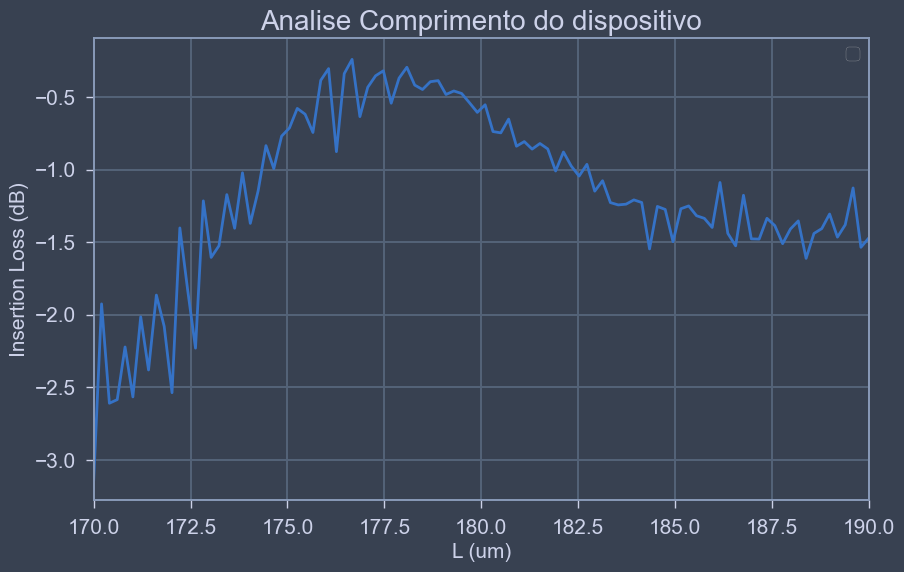

In [56]:
MMI.setemeanalysis('Propagation sweep',1)
MMI.setemeanalysis('parameter','group span 2')
MMI.setemeanalysis('start',170e-6)
MMI.setemeanalysis('stop',190e-6)
MMI.setemeanalysis('number of points',100)
MMI.emesweep('propagation sweep')

S = MMI.getemesweep('S')
S.keys()
plt.plot(S['group_span_2']*1e6,10*np.log10(1/(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2))),linewidth = 2)
#plt.plot(S['group_span_2']*1e6,10*np.log10(1/(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2))),linewidth = 2)
plt.xlabel(r'L (um)',fontsize =15)
plt.ylabel(r'Insertion Loss (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Analise Comprimento do dispositivo',fontsize =20)
plt.legend()
plt.xlim(170,190)

In [40]:
MMI.setemeanalysis('wavelength sweep',1)
MMI.setemeanalysis('start wavelength',1530e-9)
MMI.setemeanalysis('stop wavelength',1565e-9)
MMI.setemeanalysis('number of wavelength points',20)
MMI.emesweep('wavelength sweep')


C:\Users\lucas\AppData\Local\Temp\ipykernel_9588\2340962881.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
C:\Users\lucas\AppData\Local\Temp\ipykernel_9588\2340962881.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


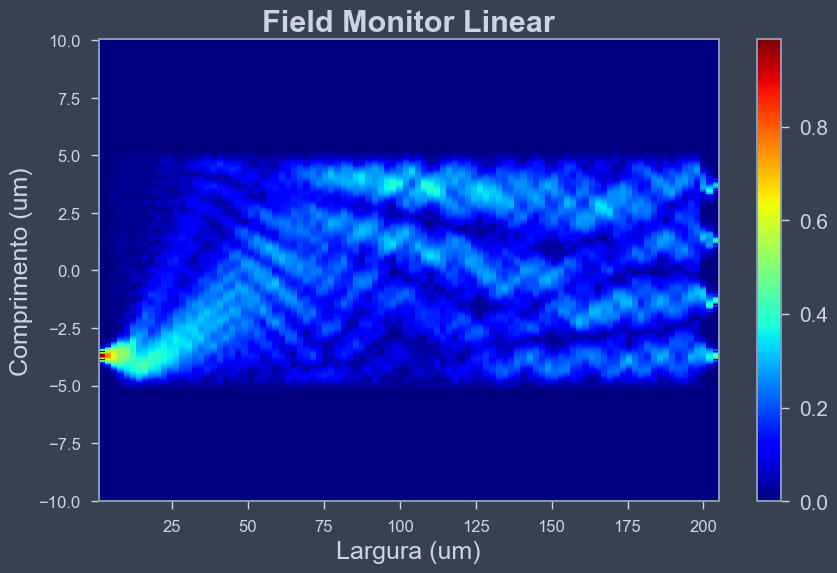

In [8]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Monitor Linear", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Linear')

C:\Users\lucas\AppData\Local\Temp\ipykernel_9588\2363872745.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
C:\Users\lucas\AppData\Local\Temp\ipykernel_9588\2363872745.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(label='dB')


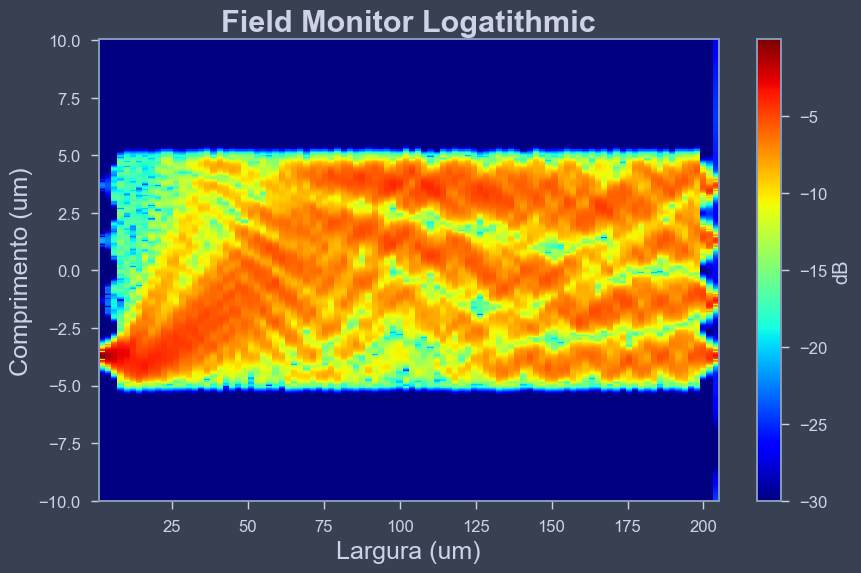

In [9]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

#Plot Logarithmic Field Monitor Graph

E = 10*np.log10(E)

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Field Monitor Logatithmic", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Logarithmic')

(-7.75, -5.8)

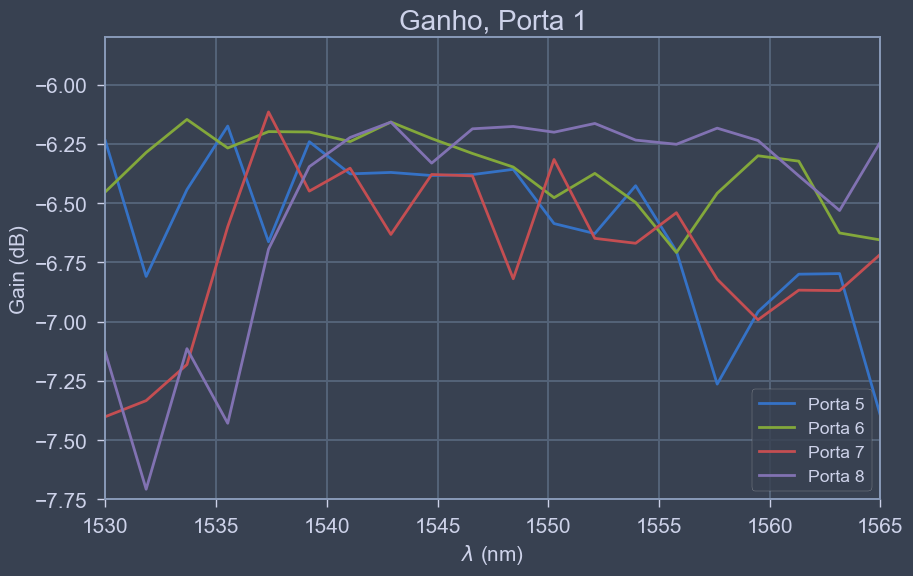

In [41]:
S= MMI.getemesweep('S_wavelength_sweep')
S.keys()
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)),linewidth = 2,label = 'Porta 5')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2)),linewidth = 2,label = 'Porta 7')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 1',fontsize =20)
plt.legend()
plt.ylim(-7.75,-5.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


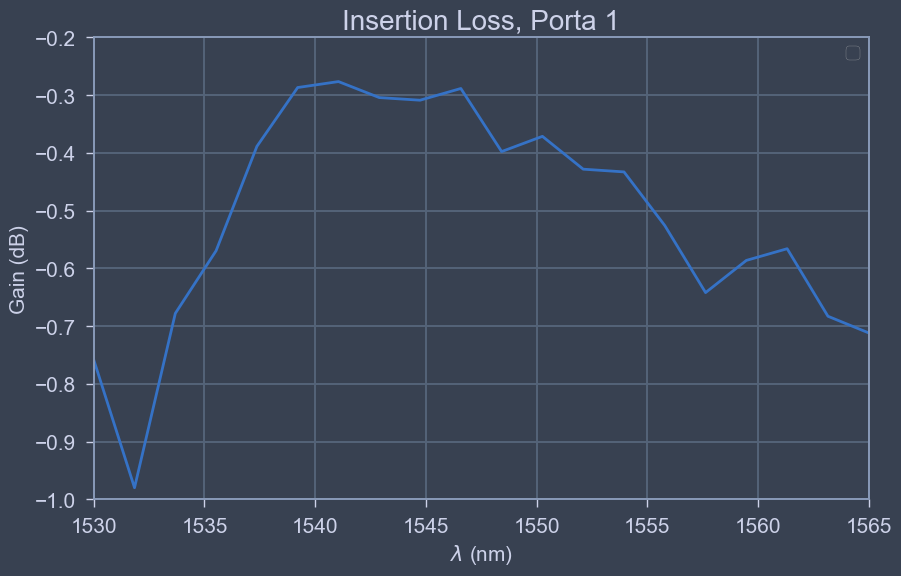

In [42]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2)),linewidth = 2)
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Insertion Loss, Porta 1',fontsize =20)
plt.ylim(-1,-0.2)
plt.legend()

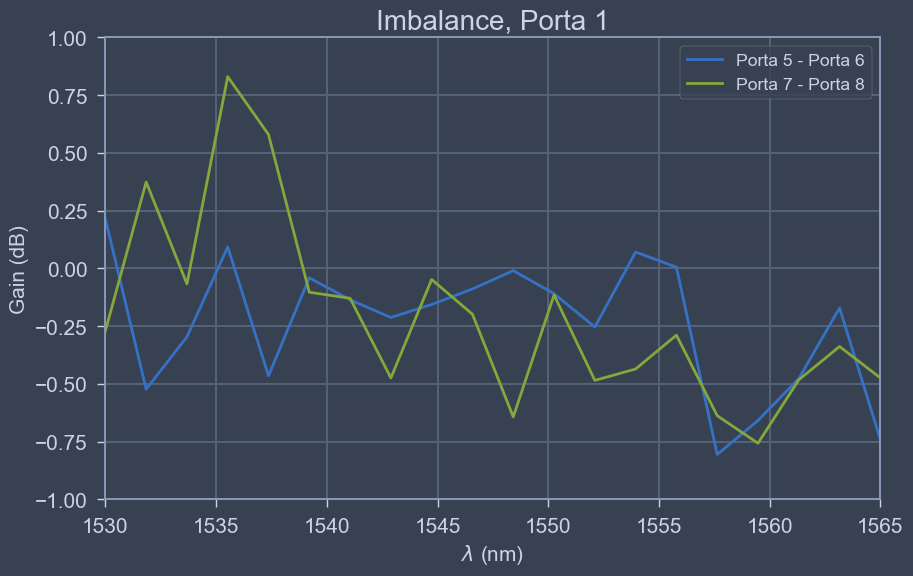

In [46]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2))-10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 5 - Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2))-10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 7 - Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance, Porta 1',fontsize =20)
plt.ylim(-1,1)
plt.legend()

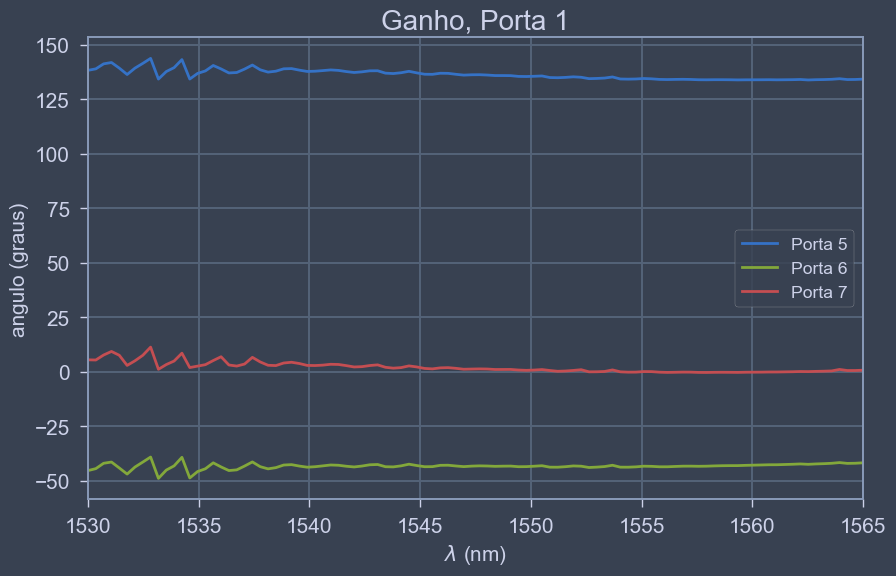

In [48]:
S= MMI.getemesweep('S_wavelength_sweep')
fase31 = MMI.unwrap(np.angle(S['s21']))
fase41 = MMI.unwrap(np.angle(S['s31']))
fase51 = MMI.unwrap(np.angle(S['s41']))
fase61 = MMI.unwrap(np.angle(S['s51']))
S.keys()
plt.plot(S['wavelength']*1e9,(fase31-fase41)/np.pi*180,linewidth = 2,label = 'Porta 5')
plt.plot(S['wavelength']*1e9,(fase31-fase51)/np.pi*180,linewidth = 2,label = 'Porta 6')
plt.plot(S['wavelength']*1e9,(fase31-fase61)/np.pi*180,linewidth = 2,label = 'Porta 7')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'angulo (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 1',fontsize =20)
plt.legend()

# Porta 3

In [3]:
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory

os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

MMI = lumapi.MODE(filename='MMI_Porta2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(170.0, 190.0)

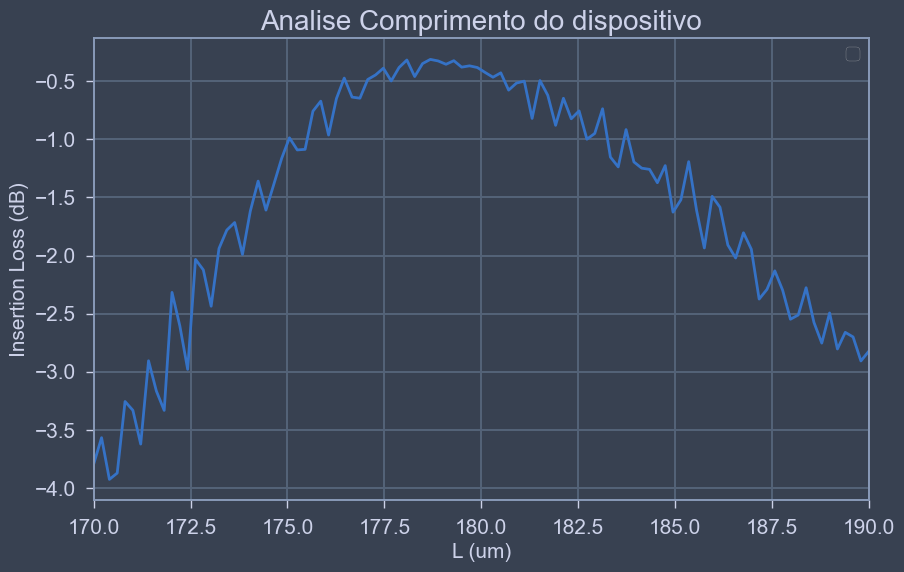

In [4]:
MMI.setemeanalysis('Propagation sweep',1)
MMI.setemeanalysis('parameter','group span 2')
MMI.setemeanalysis('start',170e-6)
MMI.setemeanalysis('stop',190e-6)
MMI.setemeanalysis('number of points',100)
MMI.emesweep('propagation sweep')

S = MMI.getemesweep('S')
S.keys()
plt.plot(S['group_span_2']*1e6,10*np.log10(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2)),linewidth = 2)
#plt.plot(S['group_span_2']*1e6,10*np.log10(1/(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2))),linewidth = 2)
plt.xlabel(r'L (um)',fontsize =15)
plt.ylabel(r'Insertion Loss (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Analise Comprimento do dispositivo',fontsize =20)
plt.legend()
plt.xlim(170,190)

C:\Users\lucas\AppData\Local\Temp\ipykernel_6332\2340962881.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
C:\Users\lucas\AppData\Local\Temp\ipykernel_6332\2340962881.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


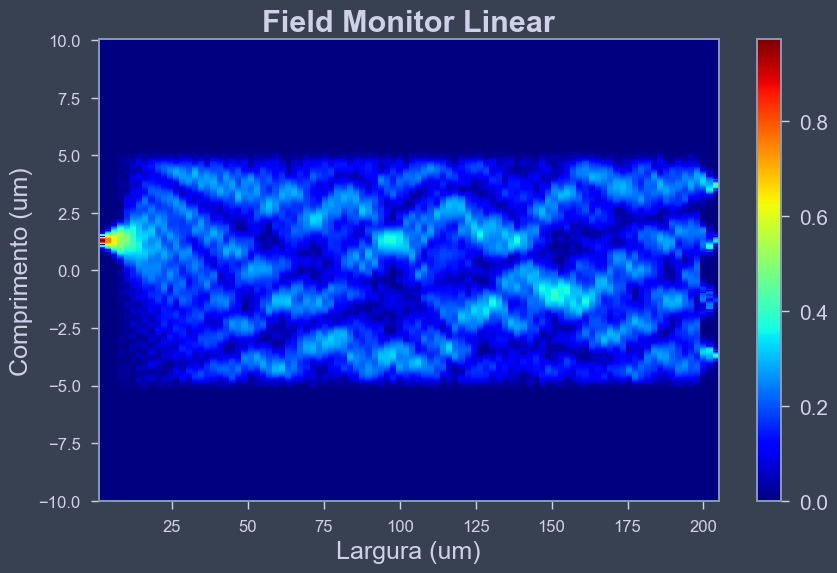

In [5]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Monitor Linear", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Linear')

C:\Users\lucas\AppData\Local\Temp\ipykernel_6332\2363872745.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
C:\Users\lucas\AppData\Local\Temp\ipykernel_6332\2363872745.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(label='dB')


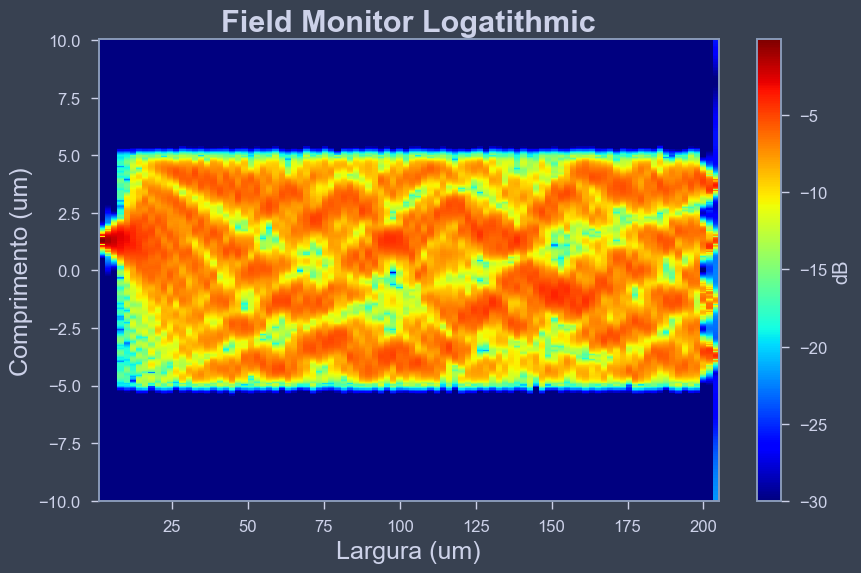

In [6]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

#Plot Logarithmic Field Monitor Graph

E = 10*np.log10(E)

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Field Monitor Logatithmic", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Logarithmic')

In [21]:
MMI.setemeanalysis('wavelength sweep',1)
MMI.setemeanalysis('start wavelength',1530e-9)
MMI.setemeanalysis('stop wavelength',1576e-9)
MMI.setemeanalysis('number of wavelength points',50)
MMI.emesweep('wavelength sweep')


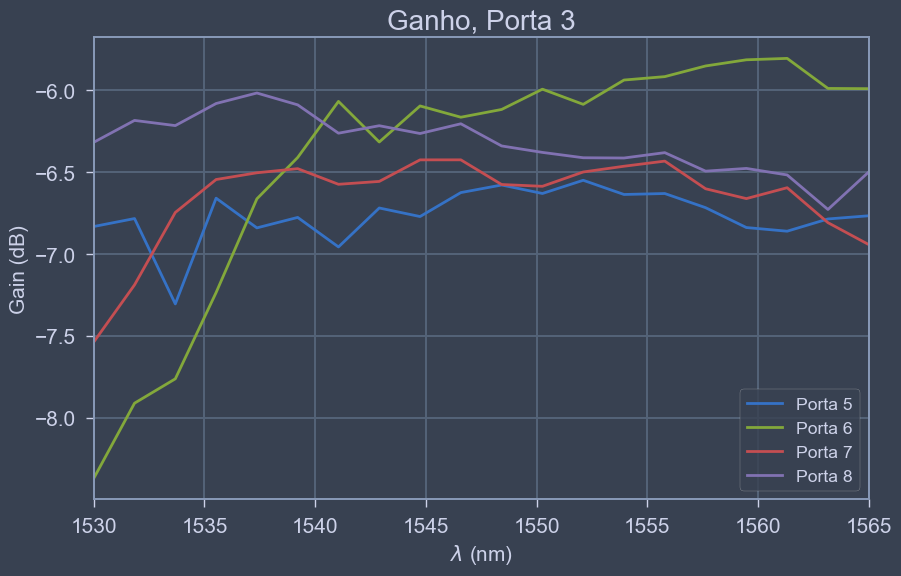

In [32]:
S= MMI.getemesweep('S_wavelength_sweep')
S.keys()
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)),linewidth = 2,label = 'Porta 5')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2)),linewidth = 2,label = 'Porta 7')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 3',fontsize =20)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


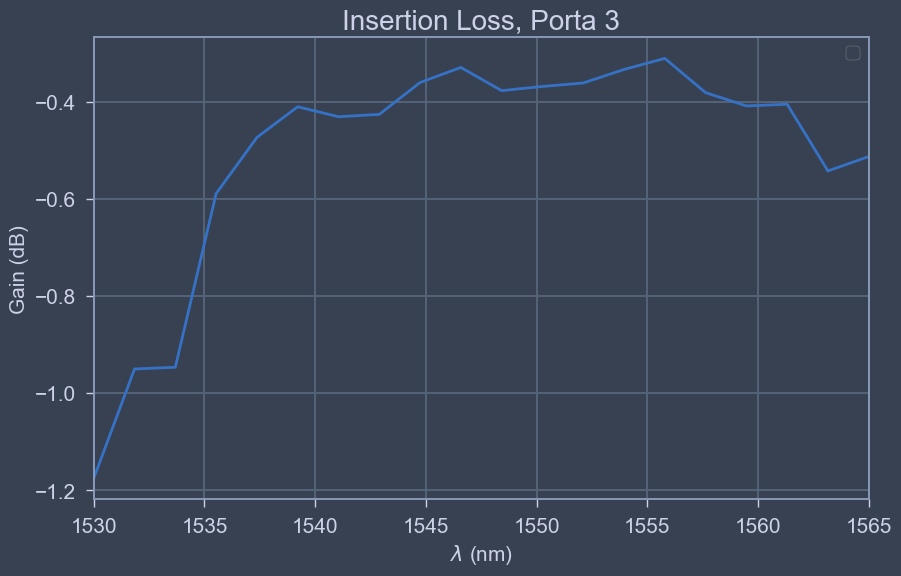

In [33]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2)),linewidth = 2)
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Insertion Loss, Porta 3',fontsize =20)
plt.legend()

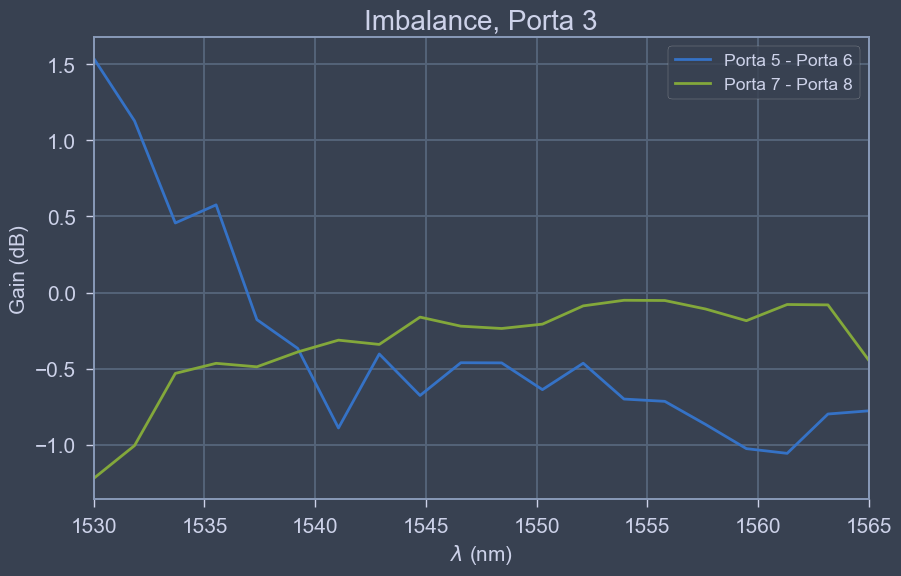

In [34]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2))-10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 5 - Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2))-10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 7 - Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance, Porta 3',fontsize =20)
plt.legend()

# Otimizado Comprimento = 178

# Porta 1

In [28]:
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory

#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

MMI = lumapi.MODE(filename='MMI-4X4_MELHOR_RESULTADO_PORTA1')

In [35]:
MMI.setemeanalysis('wavelength sweep',1)
MMI.setemeanalysis('start wavelength',1520e-9)
MMI.setemeanalysis('stop wavelength',1565e-9)
MMI.setemeanalysis('number of wavelength points',45)
MMI.emesweep('wavelength sweep')


/tmp/ipykernel_25719/2340962881.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
/tmp/ipykernel_25719/2340962881.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


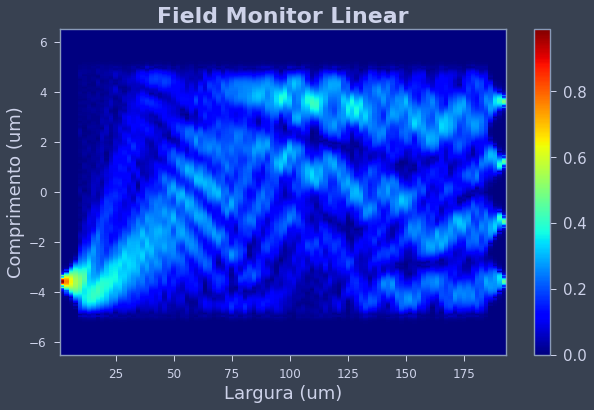

In [33]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Monitor Linear", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Linear')

/tmp/ipykernel_25719/2363872745.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
/tmp/ipykernel_25719/2363872745.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(label='dB')


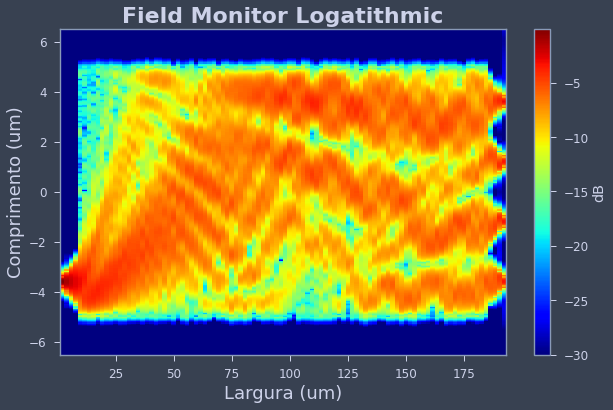

In [34]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

#Plot Logarithmic Field Monitor Graph

E = 10*np.log10(E)

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Field Monitor Logatithmic", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Logarithmic')

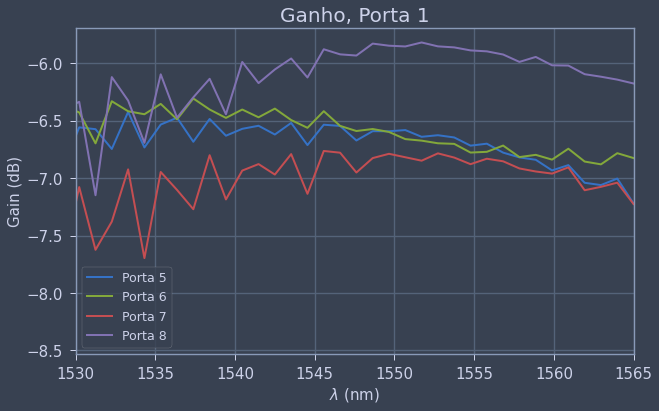

In [36]:
S= MMI.getemesweep('S_wavelength_sweep')
S.keys()
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)),linewidth = 2,label = 'Porta 5')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2)),linewidth = 2,label = 'Porta 7')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 1',fontsize =20)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


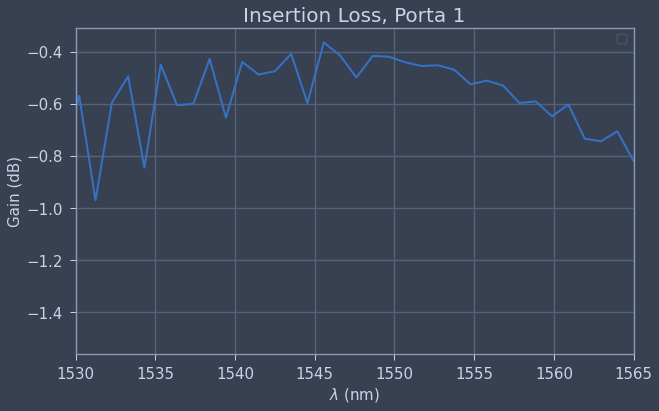

In [37]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2)),linewidth = 2)
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Insertion Loss, Porta 1',fontsize =20)
plt.legend()

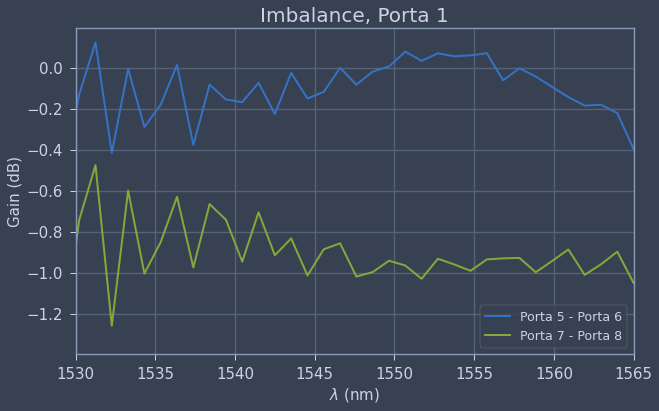

In [38]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2))-10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 5 - Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2))-10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 7 - Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance, Porta 1',fontsize =20)
plt.legend()

# Porta 3

In [ ]:
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory

#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

MMI = lumapi.MODE(filename='MMI-4X4_MELHOR_RESULTADO_PORTA3')

/tmp/ipykernel_25719/2340962881.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
/tmp/ipykernel_25719/2340962881.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


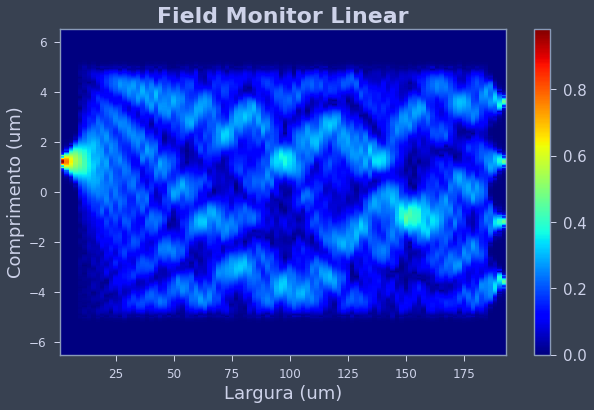

In [21]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15)
plt.title("Field Monitor Linear", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Linear')

/tmp/ipykernel_25719/2363872745.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
/tmp/ipykernel_25719/2363872745.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(label='dB')


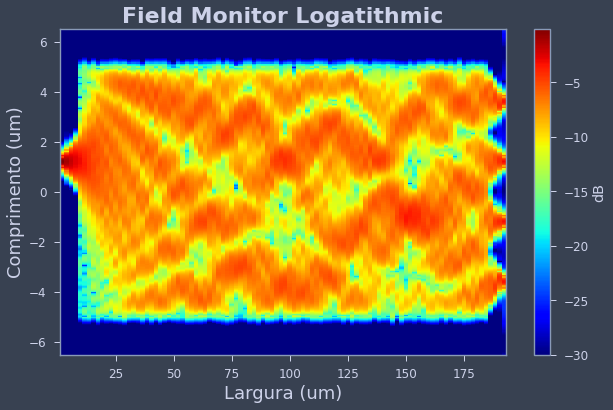

In [22]:
field = MMI.getresult('monitor','field profile')
x = field['x']
y = field['y']
E = field['E']

E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

#Plot Logarithmic Field Monitor Graph

E = 10*np.log10(E)

plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet', vmin = -30)
plt.xlabel('Largura (um)',fontsize=18)
plt.ylabel('Comprimento (um)',fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
cbar = plt.colorbar(label='dB')
cbar.ax.tick_params(labelsize=12)
plt.title("Field Monitor Logatithmic", fontsize = 22, fontweight='bold')
plt.savefig('Field Monitor Logarithmic')

In [23]:
MMI.setemeanalysis('wavelength sweep',1)
MMI.setemeanalysis('start wavelength',1520e-9)
MMI.setemeanalysis('stop wavelength',1565e-9)
MMI.setemeanalysis('number of wavelength points',45)
MMI.emesweep('wavelength sweep')


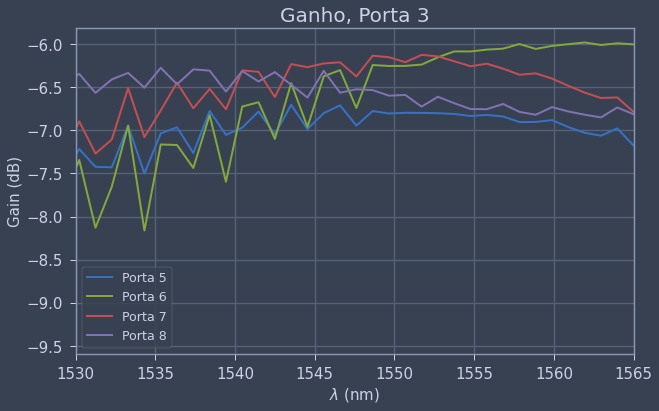

In [24]:
S= MMI.getemesweep('S_wavelength_sweep')
S.keys()
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)),linewidth = 2,label = 'Porta 5')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2)),linewidth = 2,label = 'Porta 7')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 3',fontsize =20)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


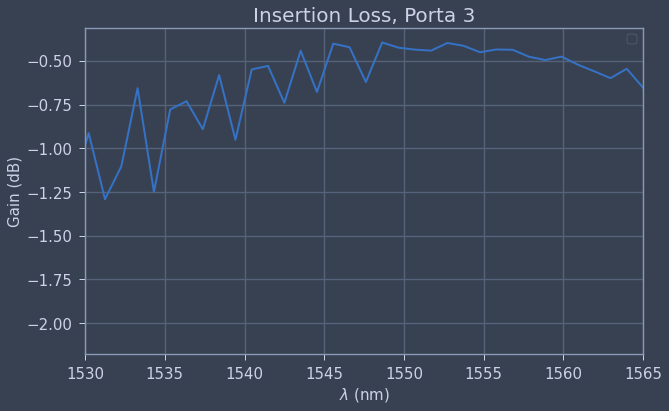

In [25]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2)+np.abs(S['s31']**2)+np.abs(S['s41']**2)+np.abs(S['s51']**2)),linewidth = 2)
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Insertion Loss, Porta 3',fontsize =20)
plt.legend()

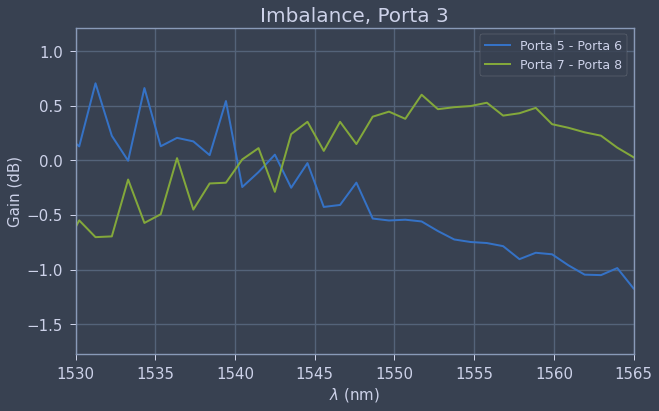

In [26]:
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s21']**2))-10*np.log10(np.abs(S['s31']**2)),linewidth = 2,label = 'Porta 5 - Porta 6')
plt.plot(S['wavelength']*1e9,10*np.log10(np.abs(S['s41']**2))-10*np.log10(np.abs(S['s51']**2)),linewidth = 2,label = 'Porta 7 - Porta 8')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance, Porta 3',fontsize =20)
plt.legend()

# Interconect

In [2]:
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

MMI = lumapi.INTERCONNECT(filename='inter.icp')

(-7.75, -5.8)

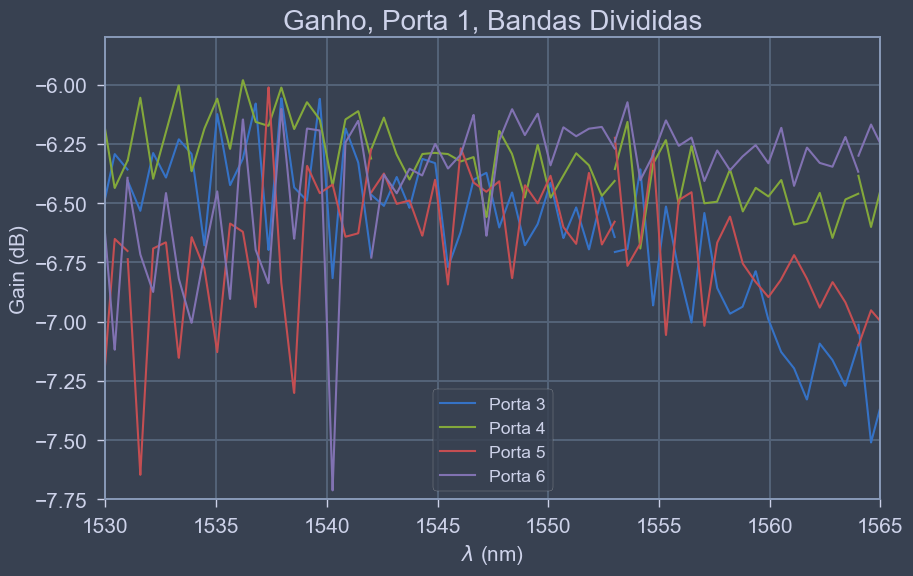

In [3]:
ganho = MMI.getresult('ONA_1','input 1/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='b')
ganho = MMI.getresult('ONA_2','input 1/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='b')
ganho = MMI.getresult('ONA_3','input 1/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='b')
ganho = MMI.getresult('ONA_4','input 1/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='b')
ganho = MMI.getresult('ONA_5','input 1/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='b',label='Porta 3')

ganho = MMI.getresult('ONA_1','input 2/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='g')
ganho = MMI.getresult('ONA_2','input 2/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='g')
ganho = MMI.getresult('ONA_3','input 2/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='g')
ganho = MMI.getresult('ONA_4','input 2/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='g')
ganho = MMI.getresult('ONA_5','input 2/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='g',label='Porta 4')

ganho = MMI.getresult('ONA_1','input 3/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='r')
ganho = MMI.getresult('ONA_2','input 3/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='r')
ganho = MMI.getresult('ONA_3','input 3/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='r')
ganho = MMI.getresult('ONA_4','input 3/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='r')
ganho = MMI.getresult('ONA_5','input 3/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='r',label='Porta 5')

ganho = MMI.getresult('ONA_1','input 4/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='m')
ganho = MMI.getresult('ONA_2','input 4/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='m')
ganho = MMI.getresult('ONA_3','input 4/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='m')
ganho = MMI.getresult('ONA_4','input 4/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='m')
ganho = MMI.getresult('ONA_5','input 4/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'],color='m',label='Porta 6')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 1, Bandas Divididas',fontsize =20)
plt.legend()
plt.ylim(-7.75,-5.8)

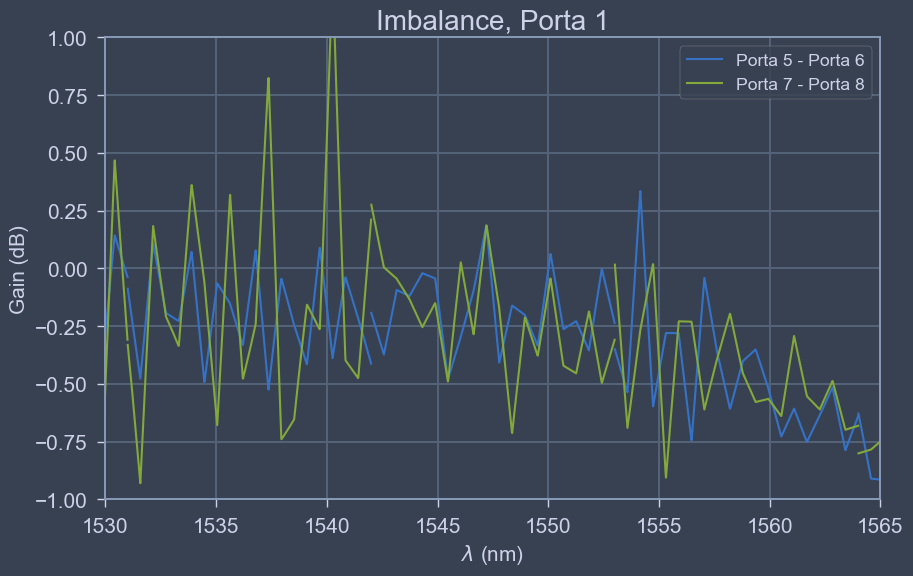

In [47]:
ganho1 = MMI.getresult('ONA_1','input 1/mode 1/gain')
ganho2 = MMI.getresult('ONA_1','input 2/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='b')

ganho1 = MMI.getresult('ONA_2','input 1/mode 1/gain')
ganho2 = MMI.getresult('ONA_2','input 2/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='b')

ganho1 = MMI.getresult('ONA_3','input 1/mode 1/gain')
ganho2 = MMI.getresult('ONA_3','input 2/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='b')

ganho1 = MMI.getresult('ONA_4','input 1/mode 1/gain')
ganho2 = MMI.getresult('ONA_4','input 2/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='b')

ganho1 = MMI.getresult('ONA_5','input 1/mode 1/gain')
ganho2 = MMI.getresult('ONA_5','input 2/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='b',label='Porta 5 - Porta 6')

ganho1 = MMI.getresult('ONA_1','input 3/mode 1/gain')
ganho2 = MMI.getresult('ONA_1','input 4/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='g')

ganho1 = MMI.getresult('ONA_2','input 3/mode 1/gain')
ganho2 = MMI.getresult('ONA_2','input 4/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='g')

ganho1 = MMI.getresult('ONA_3','input 3/mode 1/gain')
ganho2 = MMI.getresult('ONA_3','input 4/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='g')

ganho1 = MMI.getresult('ONA_4','input 3/mode 1/gain')
ganho2 = MMI.getresult('ONA_4','input 4/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='g')

ganho1 = MMI.getresult('ONA_5','input 3/mode 1/gain')
ganho2 = MMI.getresult('ONA_5','input 4/mode 1/gain')
plt.plot(ganho1['wavelength']*1e9,ganho1['mode 1 gain (dB)']-ganho2['mode 1 gain (dB)'],color='g',label='Porta 7 - Porta 8')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance, Porta 1',fontsize =20)
plt.ylim(-1,1)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-7.75, -5.8)

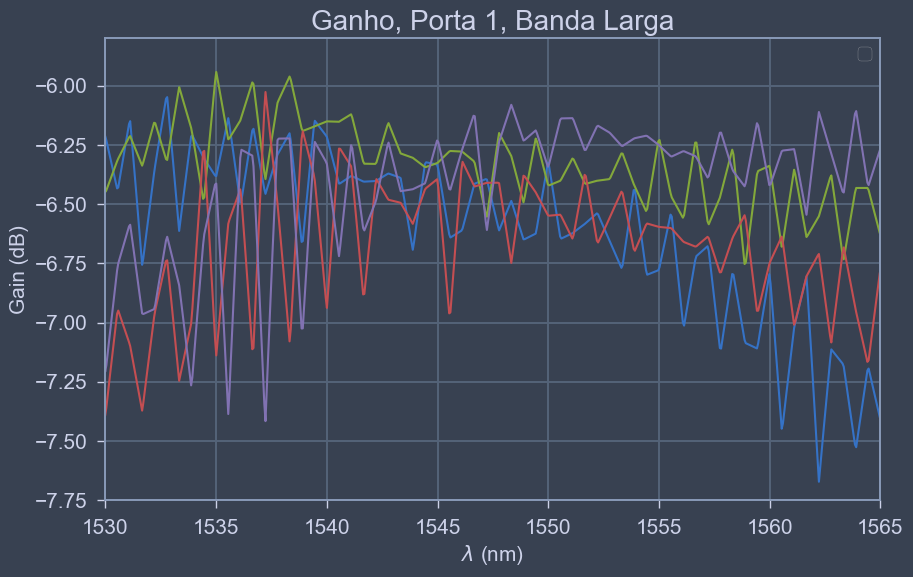

In [4]:
ganho = MMI.getresult('ONA_6','input 1/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'])

ganho = MMI.getresult('ONA_6','input 2/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'])

ganho = MMI.getresult('ONA_6','input 3/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'])

ganho = MMI.getresult('ONA_6','input 4/mode 1/gain')
plt.plot(ganho['wavelength']*1e9,ganho['mode 1 gain (dB)'])

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho, Porta 1, Banda Larga',fontsize =20)
plt.legend()
plt.ylim(-7.75,-5.8)